## Importing all the required Libraries

In [527]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Problem 1

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Data Dictionary:

spending: Amount spent by the customer per month (in 1000s)

advance_payments: Amount paid by the customer in advance by cash (in 100s)

probability_of_full_payment: Probability of payment done in full by the customer to the bank

current_balance: Balance amount left in the account to make purchases (in 1000s)

credit_limit: Limit of the amount in credit card (10000s)

min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

### Loading the Dataset

In [114]:
df1 = pd.read_csv('bank_marketing_part1_Data.csv')

### Checking the top 5 records

In [115]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Checking the shape and information of the dataframe

In [116]:
r, c = df1.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 210
No of Columns in the dataset : 7


In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Checking for any missing values 

In [68]:
df1.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

### Checking for Duplicates

In [69]:
dups = df1.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### Here we will be converting the variable into their actual units as mentioned in the data dictionary for our analysis

In [70]:
df1['spending'] = df1['spending']*1000
df1['advance_payments'] = df1['advance_payments']*100
df1['current_balance'] = df1['current_balance']*1000
df1['credit_limit'] = df1['credit_limit']*10000 
df1['min_payment_amt'] = df1['min_payment_amt']*100
df1['max_spent_in_single_shopping'] = df1['max_spent_in_single_shopping']*1000

#### Checking the data set after converting into their actual units

In [71]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


### Checking Summary Statistic

In [72]:
df1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14847.523810,1455.928571,0.870999,5628.533333,32586.047619,370.020095,5408.071429
std,2909.699431,130.595873,0.023629,443.063478,3777.144449,150.355713,491.480499
min,10590.000000,1241.000000,0.808100,4899.000000,26300.000000,76.510000,4519.000000
25%,12270.000000,1345.000000,0.856900,5262.250000,29440.000000,256.150000,5045.000000
50%,14355.000000,1432.000000,0.873450,5523.500000,32370.000000,359.900000,5223.000000
75%,17305.000000,1571.500000,0.887775,5979.750000,35617.500000,476.875000,5877.000000
max,21180.000000,1725.000000,0.918300,6675.000000,40330.000000,845.600000,6550.000000


### Checking for Outliers in the dataset using Boxplot

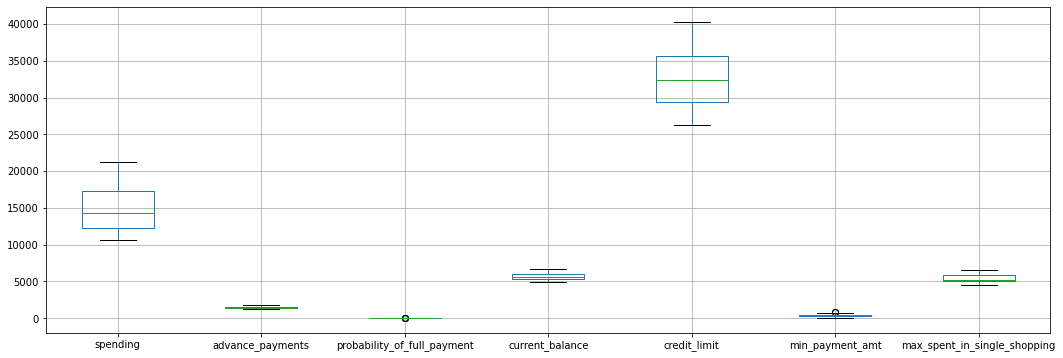

In [73]:
df1.boxplot(figsize = (18,6))

From the above box plot we can say that following variables are having outliers(significantly low):

1. Probability of payment done in full by the customer to the bank

2. Minimum paid by the customer while making payments for purchases made monthly

### Treating Outliers

These outliers value needs to be teated and there are several ways of treating them:

1. Drop the outlier value

2. Replace the outlier value using the IQR

Here we will be replacing the outlier using the IQR method

#### Create a user definded function for finding the lower and upper range for a variable so that outlier can be treated.

In [74]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [75]:
lr,ur=remove_outlier(df1['probability_of_full_payment'])
df1['probability_of_full_payment']=np.where(df1['probability_of_full_payment']>ur,ur,df1['probability_of_full_payment'])
df1['probability_of_full_payment']=np.where(df1['probability_of_full_payment']<lr,lr,df1['probability_of_full_payment'])

lr,ur=remove_outlier(df1['min_payment_amt'])
df1['min_payment_amt']=np.where(df1['min_payment_amt']>ur,ur,df1['min_payment_amt'])
df1['min_payment_amt']=np.where(df1['min_payment_amt']<lr,lr,df1['min_payment_amt'])

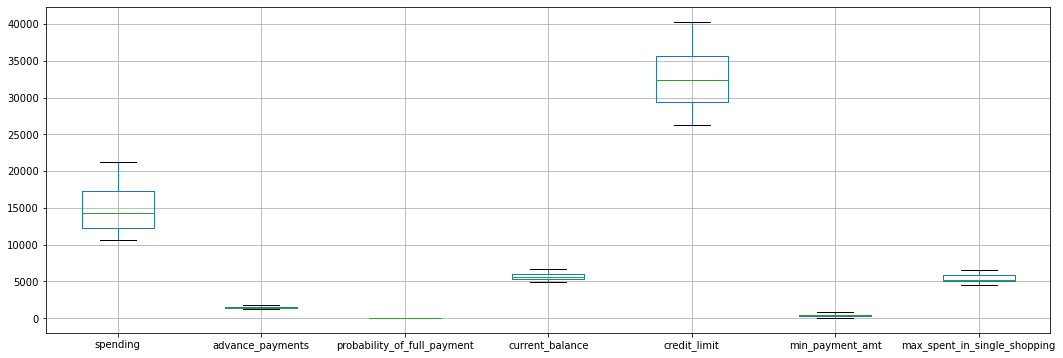

In [76]:
df1.boxplot(figsize = (18,6))

### Bivariate Analysis using Pairplot

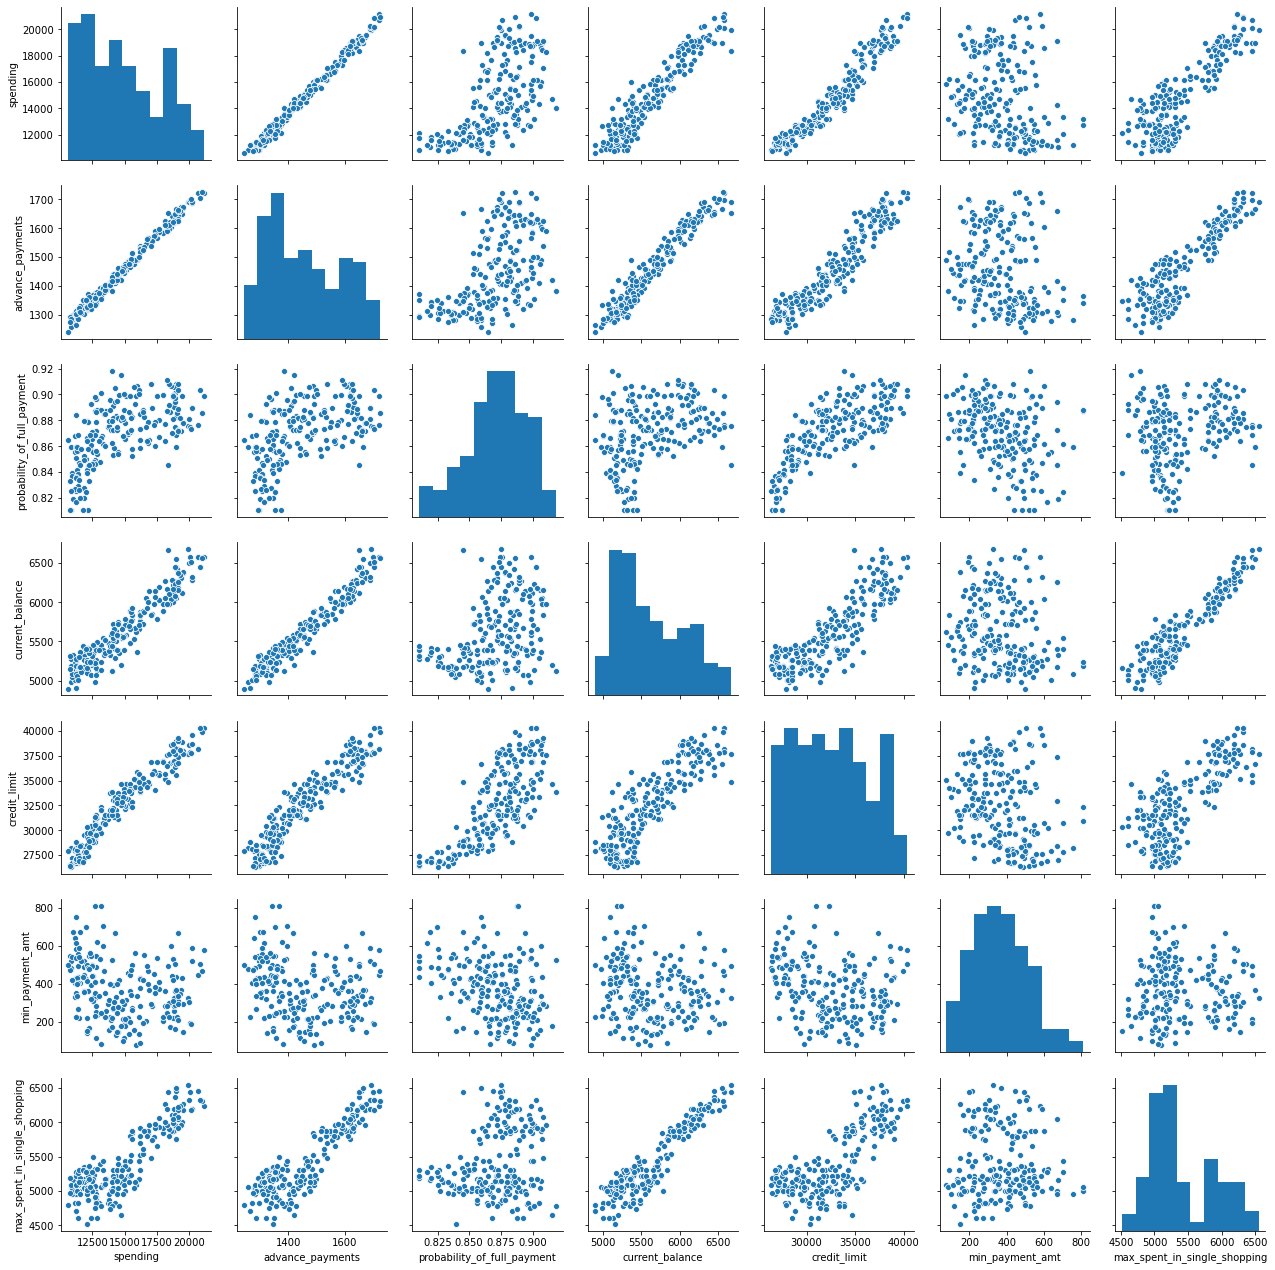

In [77]:
sns.pairplot(df1)

From the above pair plot we can say that most of the variables are highly correlated to each other

### Correlation Heatmap

In [78]:
df1_corr = df1.corr()

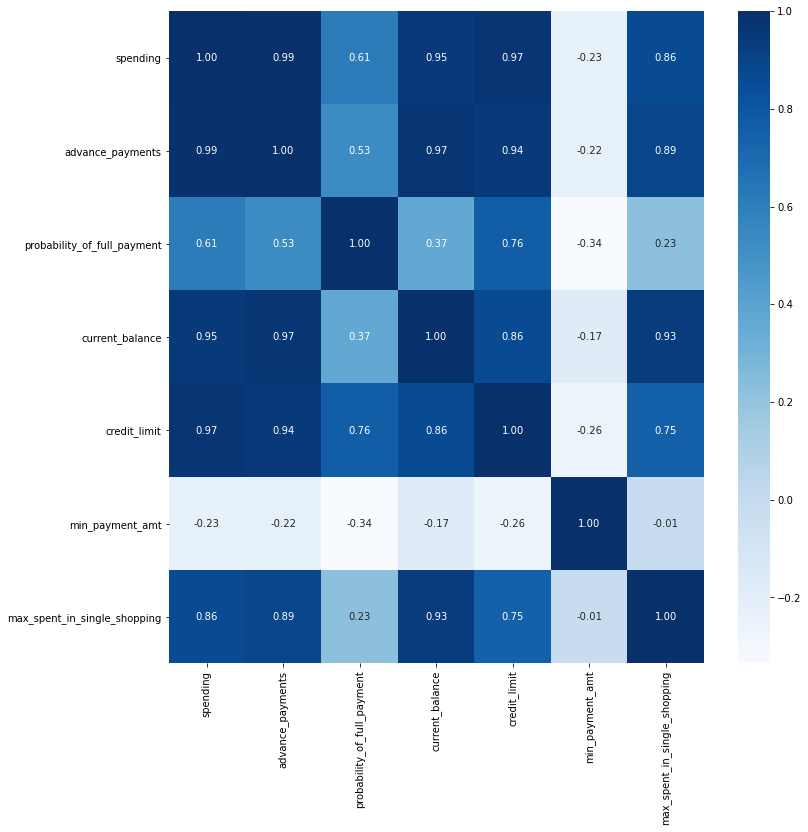

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_corr, annot=True, fmt='.2f', cmap='Blues',xticklabels='auto', yticklabels='auto')
plt.show()

##### From the above heat map we can say that the following variables are highly correlated to each other 

1. Amount spent by the customer per month
2. Amount paid by the customer in advance by cash
3. Balance amount left in the account to make purchases
4. Limit of the amount in credit card
5. Maximum amount spent in one purchase

### 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [80]:
df1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14847.523810,1455.928571,0.871025,5628.533333,32586.047619,369.728786,5408.071429
std,2909.699431,130.595873,0.023560,443.063478,3777.144449,149.468900,491.480499
min,10590.000000,1241.000000,0.810588,4899.000000,26300.000000,76.510000,4519.000000
25%,12270.000000,1345.000000,0.856900,5262.250000,29440.000000,256.150000,5045.000000
50%,14355.000000,1432.000000,0.873450,5523.500000,32370.000000,359.900000,5223.000000
75%,17305.000000,1571.500000,0.887775,5979.750000,35617.500000,476.875000,5877.000000
max,21180.000000,1725.000000,0.918300,6675.000000,40330.000000,807.962500,6550.000000


Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set probability of full payment is having values in 10,000s and other variable are more than 1. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

We will be doing this only for the numerical variables.


#### Normalizing & Scaling the Dataset

In [81]:
from scipy.stats import zscore

In [82]:
scaled_data = df1.apply(zscore)
scaled_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


If you look at the variables, all has been normalized and scaled in one scale now.

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

Clustering is a technique which is used for unsupervised learning. In Hierarchical clustering records are sequentially grouped to create clusters, based on distances between records and distances between clusters. we import dendrogram, linkage which is used to identify the optimal number of clusters. 

#### Importing dendrogram and linkage module

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

Here we will be using "ward" linkage method to create dendrogram

In [84]:
link_method = linkage(scaled_data.iloc[:,1:7], method = 'ward')

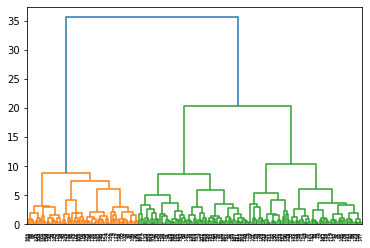

In [85]:
dend = dendrogram(link_method)

From the above dendrogram we can see that its messy, we will be ploting the dendrogram showing last 10 clusters again using the truncate function

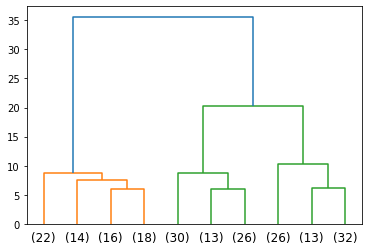

In [86]:
dend = dendrogram(link_method,truncate_mode = 'lastp',p = 10)

From the above dendrogram it is very clear that there are 3 major clusters. Hence we will create 3 clusters using fcluster module 

### Importing fcluster module to create clusters

In [87]:
from scipy.cluster.hierarchy import fcluster

Using f cluster we will be cutting the dendrogram using the distance criterion

In [88]:
clusters = fcluster(link_method,18,criterion = 'distance')
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 2, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 1, 1,
       1, 3, 3, 1, 2, 3, 2, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       1, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1,
       2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 3, 1, 2, 2, 1], dtype=int32)

By doing the below function each row is assigned to some cluster (1,2 or 3). We can append these values to our original dataset by adding a column 'clusters'

In [89]:
df1['clusters'] = clusters

The new dataset will now have additional column 'clusters'

In [90]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19940.0,1692.0,0.875200,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.906400,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.882900,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.810588,5278.0,26410.0,518.2,5185.0,3
4,17990.0,1586.0,0.899200,5890.0,36940.0,206.8,5837.0,1


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Interpret the inferences from the model.

Assiging the original dataset to another name i.e. df1_kmeans in order to differentiate between hierarchical and Kmeans

In [91]:
df1_kmeans=df1.drop(['clusters'], axis = 1)

#### Overview of Scaled Data 

In [92]:
scaled_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


#### For applying K-Means clustering we first need to import K-Means module from the library

In [93]:
from sklearn.cluster import KMeans 

#### For K-means clustering we have to define the number of clusters to be formed initially. At present we will be defining 3 clusters and we will fit the scaled data in it

In [94]:
k_means= KMeans(n_clusters = 3, random_state = 1)
k_means.fit(scaled_data)

KMeans(n_clusters=3, random_state=1)

#### Extracting Cluster Labels (n_clusters = 3 , random_state = 1)

In [95]:
k_means.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

#### Within Cluster Sum of Squares (WSS)

In [96]:
WSS = k_means.inertia_

In [97]:
print("Within Cluster Sum of Squares when K=3, random_state = 1 is :",WSS)

Within Cluster Sum of Squares when K=3, random_state = 1 is : 430.29848175122305


#### From the above we cannot determine whether the WSS score is good without checking WSS score for other clusters, hence using For loop condition we will be checking the WSS for a range from 1 to 10

In [98]:
wss = []

In [99]:
for i in range(1,11):
    KM = KMeans(n_clusters = i, random_state = 1)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)

#### WSS Score for n_clusters range from 1 to 10

In [100]:
wss

[1469.9999999999995,
 659.1474009548498,
 430.29848175122305,
 371.2217639268479,
 326.8846407681858,
 290.15133123739633,
 263.0291032947616,
 242.8107073317113,
 221.48759698221107,
 206.3290465077041]

#### In order to identify the optimum number of clusters to be formed, we need to plot elbow curve using the above wss scores ranging from 1 to 10

### Elbow Curve 

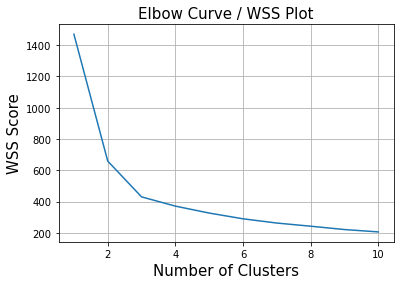

In [101]:
plt.plot(range(1,11), wss)
plt.ylabel('WSS Score',fontsize = 15)
plt.xlabel('Number of Clusters',fontsize = 15)
plt.title('Elbow Curve / WSS Plot',fontsize = 15)
plt.grid()
plt.show()

From the above Elbow Curve/Plot it is clear that 3 is the optimum number of clusters to be formed as you can see that the rate of drop after '3' is constant. 

Hence we will create K-means clustering with K = 3. 

### KMeans with K=3

In [115]:
k_means= KMeans(n_clusters = 3, random_state = 1)
k_means.fit(scaled_data)
labels = k_means.labels_

### The silhouette score for 3 Clusters

In [116]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [117]:
Silhouette_score_3 = silhouette_score(scaled_data,labels,random_state = 1)

In [118]:
print('Silhouette Score for 3 Clusters is:', Silhouette_score_3)

Silhouette Score for 3 Clusters is: 0.4008059221522216


### The silhouette score for 4 Clusters (For only comparing the score with 3 clusters)

In [102]:
k_means= KMeans(n_clusters = 4, random_state = 1)
k_means.fit(scaled_data)
labels = k_means.labels_

In [103]:
Silhouette_score_4 = silhouette_score(scaled_data,labels,random_state = 1)

In [104]:
print('Silhouette Score for 4 Clusters is:', Silhouette_score_4)

Silhouette Score for 4 Clusters is: 0.32943733699973826


### Appending Clusters to the original dataset

In [119]:
df1_kmeans['clus_Kmeans'] = labels

In [120]:
df1_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clus_Kmeans
0,19940.0,1692.0,0.875200,6675.0,37630.0,325.2,6550.0,0
1,15990.0,1489.0,0.906400,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.882900,6248.0,37550.0,336.8,6148.0,0
3,10830.0,1296.0,0.810588,5278.0,26410.0,518.2,5185.0,1
4,17990.0,1586.0,0.899200,5890.0,36940.0,206.8,5837.0,0


### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters in context to the business problem in-hand.

###  (a) Hierarchical Cluster Profiling

#### Cluster Frequency

In [214]:
df1.clusters.value_counts().sort_index()

1    70
2    69
3    71
Name: clusters, dtype: int64

From the above data we can say the following

1. Cluster 1 has 70 records/observations
2. Cluster 2 has 69 records/observations
3. Cluster 3 has 71 records/observations

#### For interpreting the inferences from the model we have to do cluster profiling where we will be grouping the records by cluster mean.

In [215]:
aggdata = df1.groupby('clusters').mean()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18345.142857,1614.671429,0.882821,6163.600000,36747.571429,364.215714,6032.342857
2,14154.782609,1420.478261,0.879549,5469.927536,32237.536232,243.285797,5082.898551
3,12072.394366,1333.873239,0.851111,5255.140845,28821.830986,498.045423,5108.605634


##### By seeing the above cluster profiling we can classify the customers based on there credit limit and monthly spending

1. Cluster 1:- Top Spending Customer (Premium Customers)
2. Cluster 2:- Medium Spending Customer (Moderate Customers)
3. Cluster 3:- Low Spending Customers (Regular Customers)

###  (a) KMeans Cluster Profiling

In [121]:
df1_kmeans['clus_Kmeans'].value_counts().sort_index()

0    67
1    72
2    71
Name: clus_Kmeans, dtype: int64

From the above data we can say the following

1. Cluster 1 has 67 records/observations
2. Cluster 2 has 72 records/observations
3. Cluster 3 has 71 records/observations

#### For interpreting the results, we have to do cluster profiling where in we will group the observations based on the cluster mean.

In [124]:
df1_kmeans.groupby('clus_Kmeans').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clus_Kmeans,,,,,,,
0,18495.373134,1620.343284,0.884210,6175.686567,36975.373134,363.237313,6041.701493
1,11856.944444,1324.777778,0.848330,5231.750000,28495.416667,473.389236,5101.722222
2,14437.887324,1433.774648,0.881597,5514.577465,32592.253521,270.734085,5120.802817


##### By seeing the above cluster profiling we can classify the customers based on there credit limit and monthly spending

1. Cluster 1:- Top Spending Customer (Premium Customers)
2. Cluster 3:- Medium Spending Customer (Moderate Customers)
3. Cluster 2:- Low Spending Customers (Regular Customers)

### Recommendations

#### 1. For Premium Customers:

(a)	Credit Limit might be increased for the customers as the amount spent by the customer per month is high as well the advance payments are high. 

(b)	More offers/rewards might be concentrated for a single transaction above certain value so that more customers end in paying more one-time amount. 

#### 2. For Moderate Customers:

(a)	The Minimum amount range can be increased for the moderate customers as you can see the minimum amount paid by the customer is very less when compared to other two clusters

(b)	Increase the credit limit and give some promotional offers to upgrade to the premium segment. Try converting them into the premium segment

#### 3. Regular Customers (Low Spending Customers):

(a)	More promotional offers/reward points to be floated to the Low spending customers to keep them loyal and increase in credit limit which might as well increase in the transactions since the probability of full payment is above 80%.


## Problem 2

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, Interpret the inferences from the descriptive statistics in a detailed manner.

### Loading the Dataset

In [528]:
df2 = pd.read_csv('insurance_part2_data.csv')

### Checking the top 5 records

In [3]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Checking the shape and information of the dataframe

In [4]:
r, c = df2.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 3000
No of Columns in the dataset : 10


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### Checking for any missing values

In [122]:
df2.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### Checking for Duplicates

In [529]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df2[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


#### Dropping duplicate values 

In [530]:
df2.drop_duplicates(inplace=True) 

In [531]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### After Dropping the duplicate values the number of observations is reduced. We can see the shape of the data set

In [441]:
r, c = df2.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 2861
No of Columns in the dataset : 10


### Checking Summary Statistic

In [9]:
df2.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861,2861,2861,2861.000000,2861,2861.000000,2861.000000,2861,2861
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1238,1709,1947,NaN,2815,NaN,NaN,1071,2327
mean,38.204124,NaN,NaN,NaN,15.080996,NaN,72.120238,61.757878,NaN,NaN
std,10.678106,NaN,NaN,NaN,25.826834,NaN,135.977200,71.399740,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,31.000000,NaN,NaN,NaN,0.000000,NaN,12.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,5.630000,NaN,28.000000,33.500000,NaN,NaN
75%,43.000000,NaN,NaN,NaN,17.820000,NaN,66.000000,69.300000,NaN,NaN


#### Checking for Unique values in the Object Category Variables

In [128]:
df2.Agency_Code.value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

In [129]:
df2.Type.value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

In [130]:
df2.Claimed.value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [131]:
df2.Channel.value_counts()

Online     2815
Offline      46
Name: Channel, dtype: int64

In [132]:
df2['Product Name'].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

In [133]:
df2['Destination'].value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

### Checking for Outliers in the dataset using Boxplot

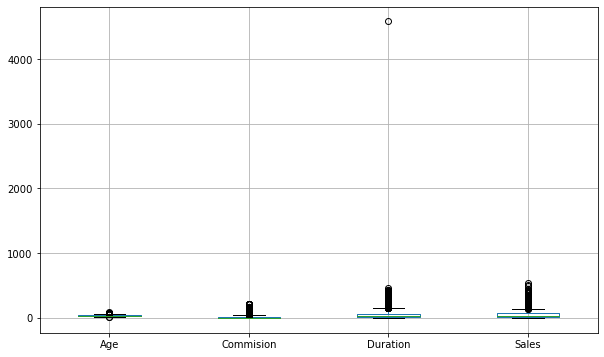

In [10]:
df2[['Age', 'Commision', 'Duration', 'Sales']].boxplot(figsize = (10,6))

##### From the above box plot we can say that all the numerical variables are having outliers:

1. Age
2. Commision
3. Duration
4. Sales

Generally Outliers in the data set will not affect the *Decision Tree Classifier & Random Forest*. But Presence of Outliers will affect the *Neural Network*. Hence we will be going through all the models we will be treating the outliers as part of EDA

#### Treating Outliers

There are several ways of treating them, below are few of them:

1. Drop the outlier value
2. Imputing with Lower Range/Upper Range 

Here we will be replacing the outlier by imputing with Lower Range/Upper Range using the IQR method

#### Create a user definded function for finding the lower and upper range for a variable so that outlier can be treated.

In [532]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [533]:
cols = ['Age', 'Commision', 'Duration', 'Sales']

In [534]:
for col in cols:
    lower_limit, upper_limit = remove_outlier(df2[col])
    df2[col] = np.where(df2[col] > upper_limit, upper_limit, df2[col])
    df2[col] = np.where(df2[col] < lower_limit, lower_limit, df2[col])   

#### Checking the Outliers using Boxplot after treating outliers. 

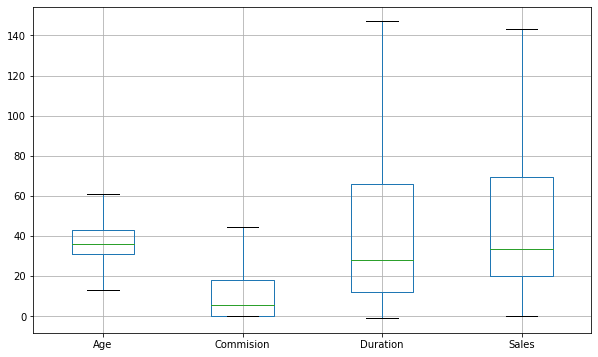

In [535]:
df2[['Age', 'Commision', 'Duration', 'Sales']].boxplot(figsize = (10,6))

From the above box plot you can see clearly that all the outliers present earlier are all treated and the data is free from outliers 

### Univariate Analysis 

##### Count Plot for the Target variable across different destinations

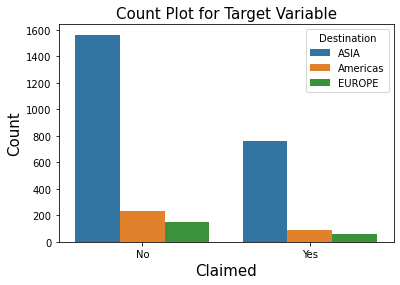

In [140]:
sns.countplot(df2['Claimed'], hue = df2['Destination'])
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Claimed',fontsize = 15)
plt.title('Count Plot for Target Variable',fontsize = 15)
plt.show()

From the above plot we can say the following 

1. Claim proportion of Asia is greater than Europe & America
2. No Claim of Asia is greater than Europe & America
3. 'No' Claim is more than 'Yes'

##### Count Plot for Different Insurance Products

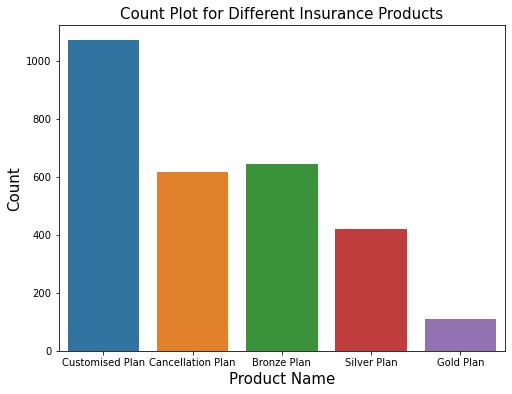

In [141]:
plt.figure(figsize=(8,6))
sns.countplot(df2['Product Name'])
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Product Name',fontsize = 15)
plt.title('Count Plot for Different Insurance Products',fontsize = 15)
plt.show()

From the above plot we can say that **Customized Plan** is widely sold Insurance Product

##### Count Plot for Different Type of Insurance Firms

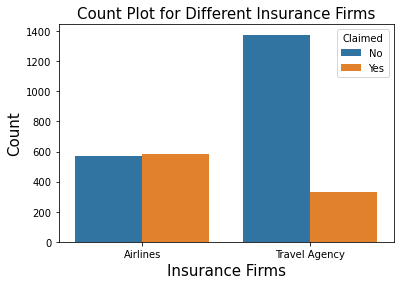

In [538]:
sns.countplot(df2['Type'], hue = df2['Claimed'])
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Insurance Firms',fontsize = 15)
plt.title('Count Plot for Different Insurance Firms',fontsize = 15)
plt.show()

From the above plot we can see that **Travel Agency** is widely used Tour Insurance

##### Count Plot for Distribution Channel of Tour Insurance 

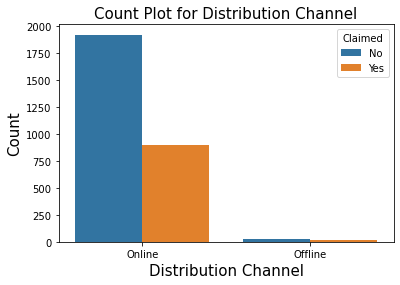

In [536]:
sns.countplot(df2['Channel'], hue = df2['Claimed'])
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Distribution Channel',fontsize = 15)
plt.title('Count Plot for Distribution Channel',fontsize = 15)
plt.show()

From the above plot we can see that **Online Distribution** is widely used

##### Count Plot for Different Insurance Agency Code

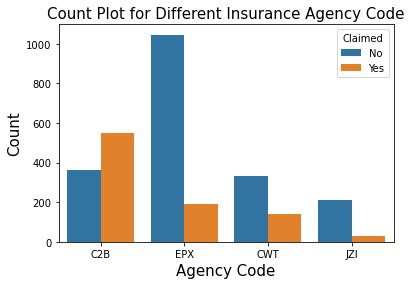

In [537]:
sns.countplot(df2['Agency_Code'], hue = df2['Claimed'])
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Agency Code',fontsize = 15)
plt.title('Count Plot for Different Insurance Agency Code',fontsize = 15)
plt.show()

### Bivariate / Multivariate Analysis

#### Checking pairwise distribution of the continuous variables

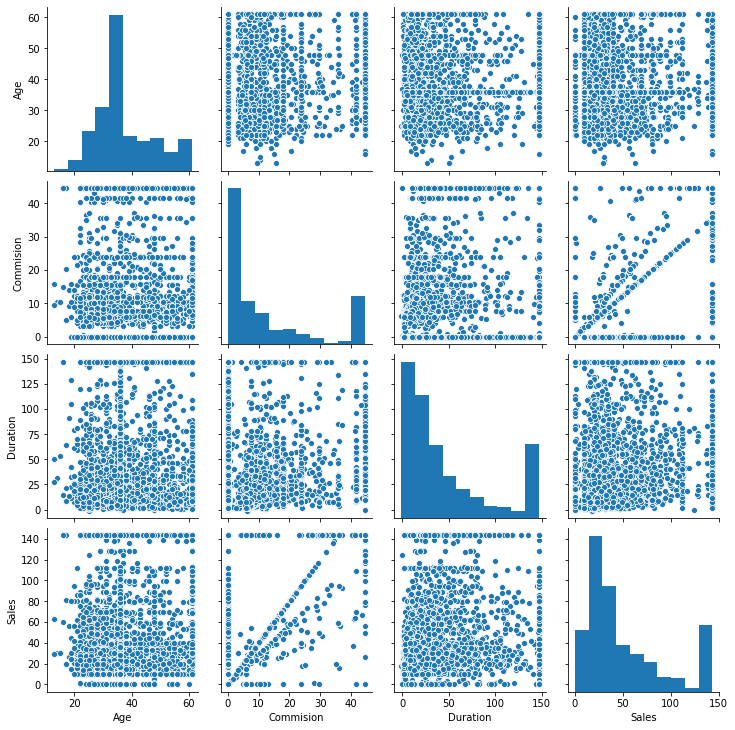

In [27]:
sns.pairplot(df2[['Age', 'Commision', 'Duration', 'Sales']])

From the above plot we can say that its distributed widely. 

#### Correlation Heatmap

In [28]:
corr = df2[['Age', 'Commision', 'Duration', 'Sales']].corr()

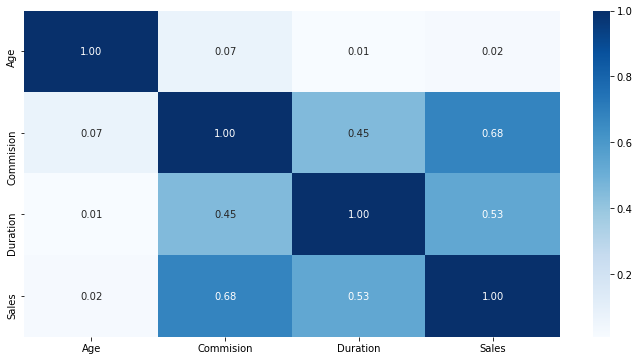

In [145]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues',xticklabels='auto', yticklabels='auto')
plt.show()

From the above Heatmap we can say there is no major correlation between variables, highest correlation is between **Commissions received for tour insurance** and **Sales of Tour Insurance firm**

### Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.

The following code loops through each column and checks if the column type is object then converts those columns
into categorical with each distinct value becoming a category or code.

In [446]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        df2[feature] = pd.Categorical(df2[feature]).codes

In [447]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 128.5 KB


In [148]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [149]:
df2.describe()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,37.896190,1.280671,0.597344,0.319469,11.756865,0.983922,47.339042,51.085089,1.666550,0.261797
std,9.821593,1.003773,0.490518,0.466352,15.502632,0.125799,47.297767,42.604294,1.277822,0.586239
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,5.630000,1.000000,28.000000,33.500000,2.000000,0.000000
75%,43.000000,2.000000,1.000000,1.000000,17.820000,1.000000,66.000000,69.300000,2.000000,0.000000
max,61.000000,3.000000,1.000000,1.000000,44.550000,1.000000,147.000000,143.250000,4.000000,2.000000


### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, Write inferences on each model.

#### Checking the proportion of the Target Variable

In [448]:
print("Percentage of 0's",round(df2.Claimed.value_counts().values[0]/df2.Claimed.count()*100,2),'%')
print("Percentage of 1's",round(df2.Claimed.value_counts().values[1]/df2.Claimed.count()*100,2),'%')

Percentage of 0's 68.05 %
Percentage of 1's 31.95 %


Approx 68% of customers have not claimed there insurance & There is no issue of class imbalance here as we have reasonable proportions in both the classes. The model is giving an accuracy of 68%. let see theperformance of the model after using the best grid paramaters

### Train Test Split

Now Our Data is ready for Testing and Training. First we will import train_test_split from sklearn library

In [449]:
from sklearn.model_selection import train_test_split

First step is to separate the Target Variable , we will be dropping the Target from the dataset and assigning it to variable 'X' and pop in another variable 'y'

In [450]:
X = df2.drop(['Claimed'],axis=1)
y = df2['Claimed']

Now we will split the data in to train and test. The training data consists of 70% of the data
and testing data consists of 30%.

In [451]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

#### Now we will check the dimensions of the Train and Test data

##### Train Data 

In [452]:
r, c = X_train.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 2002
No of Columns in the dataset : 9


In [453]:
train_labels.shape

(2002,)

##### Test Data

In [454]:
r, c = X_test.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 859
No of Columns in the dataset : 9


In [455]:
test_labels.shape

(859,)

### 1. Building a Decision Tree Classifier (CART)

In [456]:
from sklearn.tree import DecisionTreeClassifier

In [457]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [458]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

### Visualization of Decision Tree

In [459]:
from sklearn import tree

train_char_label = ['No', 'Yes']
insurance_Tree_File = open("insurance_tree_File.dot","w")
dot_data = tree.export_graphviz(dt_model, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()

The above code will save a .dot file in your working directory.

WebGraphviz is Graphviz in the Browser.

Copy paste the contents of the file into the link below to get the visualization

http://webgraphviz.com/

### Finding Best Parameters using best grid

In [197]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 12, 14, 16],
    'min_samples_leaf': [40, 50, 60],
    'min_samples_split': [120,150,180]
}

dt_model = DecisionTreeClassifier(random_state = 1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 5)

In [198]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [10, 12, 14, 16],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [120, 150, 180]})

In [199]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 150}

### Regularising the Decision Tree

In [460]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,min_samples_leaf=40,min_samples_split=150)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=40, min_samples_split=150)

### Variable Importance

In [461]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

              Importance
Agency_Code    55.216667
Sales          29.299927
Duration        6.093334
Product Name    4.354861
Commision       3.593171
Age             1.442041
Type            0.000000
Channel         0.000000
Destination     0.000000


From the above we can see the variable importance which is based on Gini Index 

### Predicting on Training and Test dataset

##### Predicting on Train Set

In [462]:
ytrain_predict = reg_dt_model.predict(X_train)

In [463]:
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

##### Predicting on Test Set

In [464]:
ytest_predict = reg_dt_model.predict(X_test)

In [465]:
ytest_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

### Model Evaluation 

##### Accuracy Score for checking the performance of prediction on Train Sets

In [466]:
print('Accuracy Score for Train Set is : ',(reg_dt_model.score(X_train,train_labels))*100)

Accuracy Score for Train Set is :  77.92207792207793


In [467]:
acc_cart_train = (reg_dt_model.score(X_train,train_labels))*100

77.92207792207793

##### Accuracy Score for checking the performance of prediction on Test Sets

In [468]:
print('Accuracy Score for Train Set is : ',(reg_dt_model.score(X_test,test_labels))*100)

Accuracy Score for Train Set is :  76.94994179278231


In [469]:
acc_cart_test =(reg_dt_model.score(X_test,test_labels))*100

### Confusion Matrix & Classification Report

Importing the required library

In [470]:
from sklearn.metrics import confusion_matrix,classification_report

#### Confusion Matrix for Train Set

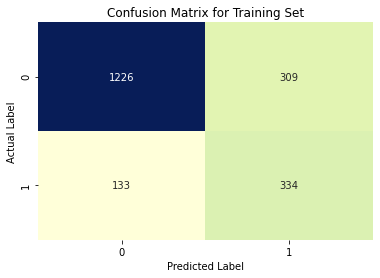

In [471]:
sns.heatmap(confusion_matrix(ytrain_predict,train_labels),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Training Set')
plt.show()

From the above confusion matrix, we can say that 309 observations is predicted as they have claimed but at actual they have not claimed. 

#### Classification Report for Train Set

In [364]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1359
           1       0.72      0.52      0.60       643

    accuracy                           0.78      2002
   macro avg       0.76      0.71      0.72      2002
weighted avg       0.77      0.78      0.77      2002



From the above classification report we can say that the following
1. Precision for the 1 (Claimed – Yes) is 72%
2. Accuracy of the model for the Train data set is 78% which is marginally ok. 
3. Recall for the 1 is 52% which is on the lower side. 


In [365]:
from sklearn import metrics

In [472]:
cart_data_train = metrics.classification_report(train_labels,ytrain_predict, output_dict = True)
df_cart_train = pd.DataFrame(cart_data_train).transpose()
cart_precision_train = (round(df_cart_train.loc['1'][0],2))*100
cart_recall_train = (round(df_cart_train.loc['1'][1],2))*100
cart_F1_train = (round(df_cart_train.loc['1'][2],2))*100

#### Confusion Matrix for Test Set

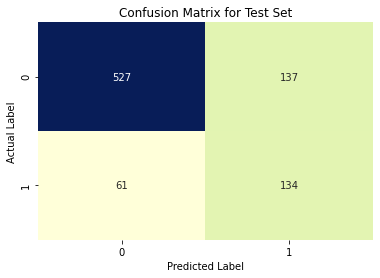

In [473]:
sns.heatmap(confusion_matrix(ytest_predict,test_labels),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [368]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       588
           1       0.69      0.49      0.58       271

    accuracy                           0.77       859
   macro avg       0.74      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



From the above classification report we can say that the following for Test set
1. Precision for the 1 (Claimed – Yes) is 69%
2. Accuracy of the model for the Test data set is 77% which is marginally ok. 
3. Recall for the 1 is 49% which is on the lower side. 


In [474]:
cart_data_test = metrics.classification_report(test_labels,ytest_predict, output_dict = True)
df_cart_test = pd.DataFrame(cart_data_test).transpose()
cart_precision_test = (round(df_cart_test.loc['1'][0],2))*100
cart_recall_test = (round(df_cart_test.loc['1'][1],2))*100
cart_F1_test = (round(df_cart_test.loc['1'][2],2))*100

### ROC Curve & AUC Score for Decision Tree Classifier

Importing the required library

In [475]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Plotting the ROC Curve and Getting the AUC Score for the Train Dataset

In [476]:
probs_cart = reg_dt_model.predict_proba(X_train)
probs_cart = probs_cart[:,1]

AUC:%.3f 82.41548481009616


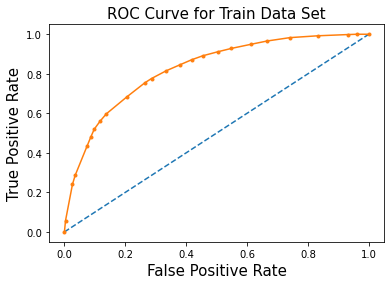

In [477]:
auc_cart_test = roc_auc_score(train_labels,probs_cart)
print('AUC:%.3f',auc_cart_test*100)
fpr,tpr,threshold = roc_curve(train_labels,probs_cart)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve for Train Data Set',fontsize = 15)
plt.show()

From the above plot we can see the ROC curve of a Train Data set and the AUC score for the train data set is 82.41% which is good. AUC score generally needs to be on the higher side. Higher the area under the curve better the model

#### Plotting the ROC Curve and Getting the AUC Score for the Test Dataset

In [478]:
probs_cart1 = reg_dt_model.predict_proba(X_test)
probs_cart1 = probs_cart1[:,1]

AUC:%.3f 78.3081682857645


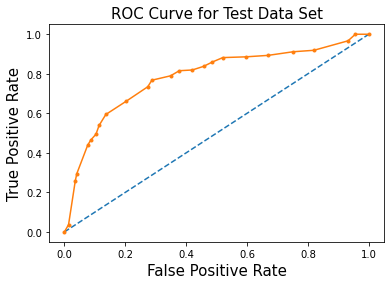

In [479]:
auc_cart_train = roc_auc_score(test_labels,probs_cart1)
print('AUC:%.3f',auc_cart_train*100)
fpr,tpr,threshold = roc_curve(test_labels,probs_cart1)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve for Test Data Set',fontsize = 15)
plt.show()

From the above plot we can see the ROC curve of a Test Data set and the AUC score for the test data set is 78.30% which is good. AUC score generally needs to be on the higher side. Higher the area under the curve better the model

### 2. Building a Random Forest Classifier

#### Importing required Libraries from the sklearn

In [480]:
from sklearn.ensemble import RandomForestClassifier

In [481]:
rfcl = RandomForestClassifier(n_estimators = 500, random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

#### Perform Grid Search

In [377]:
param_grid = {
    'max_depth': [6,7,8],
    'max_features': [6,7,8],
    'min_samples_leaf': [10,20,30],
    'min_samples_split': [30, 60,90],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [322]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [6, 7, 8],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [30, 60, 90],
                         'n_estimators': [301, 501]})

#### Get best parameters

In [323]:
print(grid_search.best_params_)

{'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 301}


In [324]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, max_features=6, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=301)

### Regularising the Random Forest Classifier with the best parameters obtained through GridSearch CV

In [482]:
rfcl = RandomForestClassifier(n_estimators = 501, 
                              max_depth = 6, 
                              max_features = 6, 
                              min_samples_leaf = 10, 
                              min_samples_split = 30, 
                              random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

#### Variable Importance

In [483]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

              Importance
Agency_Code    34.257265
Sales          20.183529
Product Name   19.749426
Commision       8.771553
Duration        7.815181
Age             6.400062
Type            1.383588
Destination     1.265312
Channel         0.174084


From the above we can see the variable importance, Agency_code is the most important variable

### Predicting on Training and Test dataset

#### Train Data Set 

In [484]:
ytrain_predict1 = rfcl.predict(X_train)

In [485]:
ytrain_predict1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

#### Test Data Set

In [486]:
ytest_predict1 = rfcl.predict(X_test)

In [487]:
ytest_predict 

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

### Model Evaluation

#### Accuracy Score for checking the performance of prediction on Train Sets

In [488]:
print('Accuracy Score for Train Set is : ',(rfcl.score(X_train,train_labels))*100)

Accuracy Score for Train Set is :  80.36963036963037


In [489]:
acc_rfcl_train = (rfcl.score(X_train,train_labels))*100

#### Accuracy Score for checking the performance of prediction on Test Sets

In [490]:
print('Accuracy Score for Test Set is : ',(rfcl.score(X_test,test_labels))*100)

Accuracy Score for Test Set is :  78.69615832363212


In [491]:
acc_rfcl_test = (rfcl.score(X_test,test_labels))*100

### Confusion Matrix & Classification Report

#### Confusion Matrix for the Train Data set

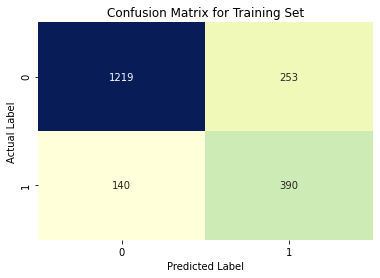

In [386]:
sns.heatmap(confusion_matrix(ytrain_predict1,train_labels),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Training Set')
plt.show()

From the above we you can see that the number of observations is Actually 'No' and Predicted 'Yes' reduced from 309 (From decision tree) to 253 in random forest classifier. 

#### Classification Report for Train Set

In [387]:
print(classification_report(train_labels,ytrain_predict1))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.74      0.61      0.66       643

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002



From the above classification report we can say that the following for Train set
1. Precision for the 1 (Claimed – Yes) is 74%
2. Accuracy of the model for the Train data set is 80% which is better than Decision Tree Classifier.
3. Recall for the 1 is 61% which is comparatively ok. 


In [492]:
rfcl_data_train = metrics.classification_report(train_labels,ytrain_predict1, output_dict = True)
df_rfcl_train = pd.DataFrame(rfcl_data_train).transpose()
rfcl_precision_train = (round(df_rfcl_train.loc['1'][0],2))*100
rfcl_recall_train = (round(df_rfcl_train.loc['1'][1],2))*100
rfcl_F1_train = (round(df_rfcl_train.loc['1'][2],2))*100

#### Confusion Matrix for the Test Data set

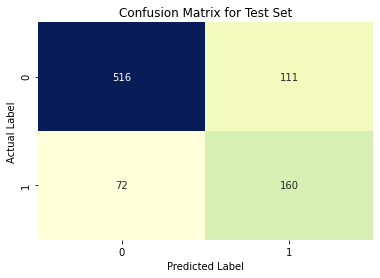

In [389]:
sns.heatmap(confusion_matrix(ytest_predict1,test_labels),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

#### Classification Report for Train Set

In [390]:
print(classification_report(test_labels,ytest_predict1))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.69      0.59      0.64       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



From the above classification report we can say that the following for Test set

1. Precision for the 1 (Claimed – Yes) is 69%
2. Accuracy of the model for the Test data set is 79% which is better than Decision Tree Classifier.
3. Recall for the 1 is 59% which is comparatively ok.

In [493]:
rfcl_data_test = metrics.classification_report(test_labels,ytest_predict1, output_dict = True)
df_rfcl_test = pd.DataFrame(rfcl_data_test).transpose()
rfcl_precision_test = (round(df_rfcl_test.loc['1'][0],2))*100
rfcl_recall_test = (round(df_rfcl_test.loc['1'][1],2))*100
rfcl_F1_test = (round(df_rfcl_test.loc['1'][2],2))*100

### ROC Curve & AUC Score for Random Tree Classifier

#### Ploting the ROC Curve and Getting the AUC Score for the Training Data Set 

In [494]:
probs_rfcl = rfcl.predict_proba(X_train)
probs_rfcl = probs_rfcl[:,1]

AUC:%.3f 85.48665254503986


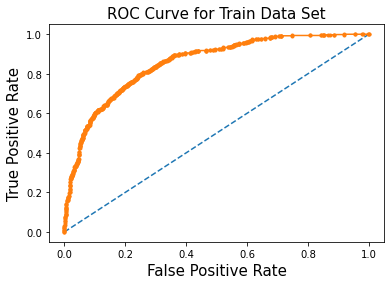

In [496]:
auc_rfcl_train = roc_auc_score(train_labels,probs_rfcl)
print('AUC:%.3f',auc_rfcl_train*100)
fpr,tpr,threshold = roc_curve(train_labels,probs_rfcl)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve for Train Data Set',fontsize = 15)
plt.show()

From the above plot we can see the ROC curve of a Train Data set and the AUC score for the train data set i.e. 85.48% which is good. AUC score generally needs to be on the higher side. Higher the area under the curve better the model

#### Ploting the ROC Curve and Getting the AUC Score for the Test Data Set

AUC:%.3f 81.91474006576802


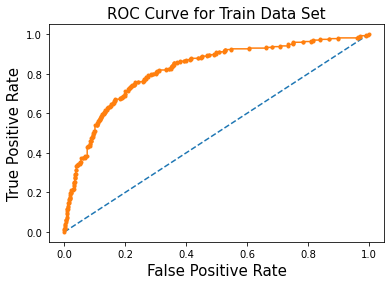

In [497]:
probs_rfcl1 = rfcl.predict_proba(X_test)
probs_rfcl1 = probs_rfcl1[:,1]
auc_rfcl_test = roc_auc_score(test_labels,probs_rfcl1)
print('AUC:%.3f',auc_rfcl_test*100)
fpr,tpr,threshold = roc_curve(test_labels,probs_rfcl1)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve for Train Data Set',fontsize = 15)
plt.show()

From the above plot we can see the ROC curve of a Train Data set and the AUC score for the train data set i.e. 81.91% which is good. AUC score generally needs to be on the higher side. Higher the area under the curve better the model

### 3. Building Artificial Neural Network

In [498]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [499]:
X_train.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1300,61.0,0,0,6.00,1,7.0,15.0,0,0
2332,36.0,2,1,0.00,1,29.0,35.0,2,0
900,60.0,1,1,41.58,1,8.0,69.3,2,1
207,36.0,0,0,9.75,1,70.0,39.0,4,0
2310,36.0,2,1,0.00,1,39.0,51.0,1,2


From the above data set we can cleary see that few variables are in single digits and few are in double digits. As Neural Networks are prone to scaling and it affects the model. 

Hence, we will be the scaling our data

#### Importing Necessary Libraries required for Scaling

In [500]:
from sklearn.preprocessing import StandardScaler

In [501]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [502]:
X_train

array([[ 2.35126368, -1.2626112 , -1.19813318, ..., -0.84677146,
        -1.31338076, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.37328775,
         0.24339146, -0.44775345],
       [ 2.24905924, -0.27289013,  0.83463176, ...,  0.43873682,
         0.24339146,  1.24676906],
       ...,
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.89411983,
        -0.53499465, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ...,  1.44962454,
         0.24339146, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ...,  1.44962454,
         0.24339146,  1.24676906]])

From the above array we can see that all the data has been scaled. 

In [503]:
X_test = sc.transform(X_test)

In [504]:
X_test

array([[-0.71486952, -0.27289013,  0.83463176, ...,  1.09451176,
         0.24339146, -0.44775345],
       [ 2.35126368,  0.71683095,  0.83463176, ..., -0.51533286,
        -0.53499465, -0.44775345],
       [ 0.40937932, -1.2626112 , -1.19813318, ...,  0.78674734,
         1.80016368, -0.44775345],
       ...,
       [ 1.32921928, -1.2626112 , -1.19813318, ..., -0.82309727,
        -1.31338076, -0.44775345],
       [ 1.53362816,  0.71683095,  0.83463176, ..., -0.70472634,
         0.24339146, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.70472634,
         0.24339146, -0.44775345]])

### Building a Neural Network Model

#### Importing the necessary libraries required for builing a neural network

In [505]:
from sklearn.neural_network import MLPClassifier

In [506]:
ann_clf = MLPClassifier(hidden_layer_sizes = 100, 
                        max_iter = 5000, 
                        solver = 'sgd', 
                        verbose = 'True', 
                        random_state = 1, 
                        tol = 0.001)

In [507]:
ann_clf.fit(X_train,train_labels)

Iteration 1, loss = 0.72743808
Iteration 2, loss = 0.70352947
Iteration 3, loss = 0.67416971
Iteration 4, loss = 0.65076697
Iteration 5, loss = 0.63260467
Iteration 6, loss = 0.61683205
Iteration 7, loss = 0.60197919
Iteration 8, loss = 0.58969497
Iteration 9, loss = 0.58002789
Iteration 10, loss = 0.57351822
Iteration 11, loss = 0.56729247
Iteration 12, loss = 0.56152200
Iteration 13, loss = 0.55657106
Iteration 14, loss = 0.55233529
Iteration 15, loss = 0.54921774
Iteration 16, loss = 0.54616389
Iteration 17, loss = 0.54349069
Iteration 18, loss = 0.54088284
Iteration 19, loss = 0.53811682
Iteration 20, loss = 0.53586380
Iteration 21, loss = 0.53379615
Iteration 22, loss = 0.53196992
Iteration 23, loss = 0.53006151
Iteration 24, loss = 0.52831094
Iteration 25, loss = 0.52693927
Iteration 26, loss = 0.52582620
Iteration 27, loss = 0.52462064
Iteration 28, loss = 0.52332733
Iteration 29, loss = 0.52237742
Iteration 30, loss = 0.52121811
Iteration 31, loss = 0.52010509
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.001, verbose='True')

#### Model Tuning through Grid Search

In [508]:
param_grid = {'hidden_layer_sizes':[100,500],
              'max_iter':[5000,7500],
              'solver':['sgd','adam'],
              'tol':[0.01, 0.001]}

nncl = MLPClassifier(random_state = 1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid,cv= 3)

In [509]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 500],
                         'max_iter': [5000, 7500], 'solver': ['sgd', 'adam'],
                         'tol': [0.01, 0.001]})

In [510]:
grid_search.best_params_

{'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.001}

### Regularising the Neural Network Classifier with the best parameters obtained through GridSearch CV

In [511]:
ann_clf = MLPClassifier(hidden_layer_sizes = 500, 
                        max_iter = 5000, 
                        solver = 'adam', 
                        verbose = 'True', 
                        random_state = 1, 
                        tol = 0.001)

In [512]:
ann_clf.fit(X_train,train_labels)

Iteration 1, loss = 0.60822569
Iteration 2, loss = 0.53090169
Iteration 3, loss = 0.51649324
Iteration 4, loss = 0.51005790
Iteration 5, loss = 0.50866209
Iteration 6, loss = 0.50722657
Iteration 7, loss = 0.50367873
Iteration 8, loss = 0.50651650
Iteration 9, loss = 0.50980786
Iteration 10, loss = 0.50920450
Iteration 11, loss = 0.50602654
Iteration 12, loss = 0.50166396
Iteration 13, loss = 0.49953417
Iteration 14, loss = 0.49831522
Iteration 15, loss = 0.49662144
Iteration 16, loss = 0.49897286
Iteration 17, loss = 0.50175476
Iteration 18, loss = 0.49726941
Iteration 19, loss = 0.49635563
Iteration 20, loss = 0.49619974
Iteration 21, loss = 0.49934185
Iteration 22, loss = 0.49956436
Iteration 23, loss = 0.49227847
Iteration 24, loss = 0.49267425
Iteration 25, loss = 0.49500455
Iteration 26, loss = 0.49531678
Iteration 27, loss = 0.49354134
Iteration 28, loss = 0.49507027
Iteration 29, loss = 0.50322017
Iteration 30, loss = 0.49753757
Iteration 31, loss = 0.49369687
Iteration 32, los

MLPClassifier(hidden_layer_sizes=500, max_iter=5000, random_state=1, tol=0.001,
              verbose='True')

### Predicting on Training and Test dataset

#### Train Dataset

In [513]:
ytrain_predict2 = ann_clf.predict(X_train)

In [514]:
ytrain_predict2

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

#### Test Dataset

In [515]:
ytest_predict2 = ann_clf.predict(X_test)

In [516]:
ytest_predict2

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

### Model Evaluation

#### Accuracy Score for checking the performance of prediction on Train Sets

In [517]:
print('Accuracy Score for Train Set is : ',(ann_clf.score(X_train,train_labels))*100)

Accuracy Score for Train Set is :  77.02297702297702


In [518]:
acc_ann_train = (ann_clf.score(X_train,train_labels))*100

#### Accuracy Score for checking the performance of prediction on Test Sets

In [519]:
print('Accuracy Score for Test Set is : ',(ann_clf.score(X_test,test_labels))*100)

Accuracy Score for Test Set is :  76.60069848661234


In [520]:
acc_ann_test = (ann_clf.score(X_test,test_labels))*100

### Confusion Matrix & Classification Report

#### Confusion Matrix for the Train Data set

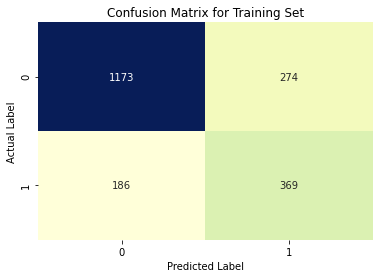

In [417]:
sns.heatmap(confusion_matrix(ytrain_predict2,train_labels),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Training Set')
plt.show()

From the above we you can see that the number of observations is Actually 'No' and Predicted 'Yes' reduced from 309 (From decision tree) to 274 in random forest classifier.

#### Classification Report for the Train Data Set

In [418]:
print(classification_report(train_labels,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1359
           1       0.66      0.57      0.62       643

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.77      2002



From the above classification report we can say that the following for Train set

1. Precision for the 1 (Claimed – Yes) is 66%
2. Accuracy of the model for the Train data set is 77%
3. Recall for the 1 is 57% which is marginally ok.

In [521]:
ann_data_train = metrics.classification_report(train_labels,ytrain_predict2, output_dict = True)
df_ann_train = pd.DataFrame(ann_data_train).transpose()
ann_precision_train = (round(df_ann_train.loc['1'][0],2))*100
ann_recall_train = (round(df_ann_train.loc['1'][1],2))*100
ann_F1_train = (round(df_ann_train.loc['1'][2],2))*100

#### Confusion Matrix for the Test Data set

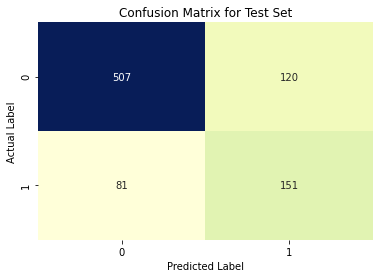

In [268]:
sns.heatmap(confusion_matrix(ytest_predict2,test_labels),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

#### Classification Report for the Test Data Set

In [269]:
print(classification_report(test_labels,ytest_predict2))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       588
           1       0.65      0.56      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



From the above classification report we can say that the following for Train set

1. Precision for the 1 (Claimed – Yes) is 65%
2. Accuracy of the model for the Train data set is 77%
3. Recall for the 1 is 56% which is marginally ok.

In [522]:
ann_data_test = metrics.classification_report(test_labels,ytest_predict2, output_dict = True)
df_ann_test = pd.DataFrame(ann_data_test).transpose()
ann_precision_test = (round(df_ann_test.loc['1'][0],2))*100
ann_recall_test = (round(df_ann_test.loc['1'][1],2))*100
ann_F1_test = (round(df_ann_test.loc['1'][2],2))*100

### ROC Curve & AUC Score for Neural Network Classifier

#### Ploting the ROC Curve and Getting the AUC Score for the Training Data Set

AUC:%.3f 80.3548602313704


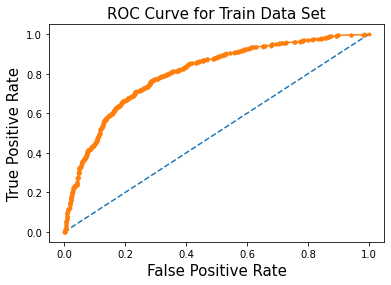

In [523]:
probs_ann = ann_clf.predict_proba(X_train)
probs_ann = probs_ann[:,1]
auc_ann_train = roc_auc_score(train_labels,probs_ann)
print('AUC:%.3f',auc_ann_train*100)
fpr,tpr,threshold = roc_curve(train_labels,probs_ann)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve for Train Data Set',fontsize = 15)
plt.show()

From the above plot we can see the ROC curve of a Test Data set and the AUC score for the test data set is 80.35% which is good. AUC score generally needs to be on the higher side. Higher the area under the curve better the model

#### Ploting the ROC Curve and Getting the AUC Score for the Test Data Set

AUC:%.3f 80.2758741873133


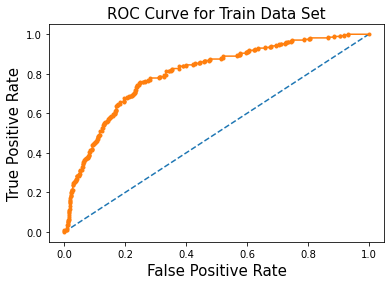

In [524]:
probs_ann1 = ann_clf.predict_proba(X_test)
probs_ann1 = probs_ann1[:,1]
auc_ann_test = roc_auc_score(test_labels,probs_ann1)
print('AUC:%.3f',auc_ann_test*100)
fpr,tpr,threshold = roc_curve(test_labels,probs_ann1)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.ylabel('True Positive Rate',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.title('ROC Curve for Train Data Set',fontsize = 15)
plt.show()

From the above plot we can see the ROC curve of a Test Data set and the AUC score for the test data set is 80.27% which is good. AUC score generally needs to be on the higher side. Higher the area under the curve better the model

### 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized.

In [525]:
index = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score']
data = pd.DataFrame({'CART Train' : [acc_cart_train, auc_cart_train*100, cart_precision_train, cart_recall_train, cart_F1_train],
                     'CART Test' : [acc_cart_test, auc_cart_test*100,cart_precision_test, cart_recall_test, cart_F1_test],
                     'Random Forest Train' : [acc_rfcl_train, auc_rfcl_train*100,rfcl_precision_train, rfcl_recall_train, rfcl_F1_train],
                     'Random Forest Test' : [acc_rfcl_test, auc_rfcl_test*100, rfcl_precision_test, rfcl_recall_test, rfcl_F1_test],
                     'ANN Train' : [acc_ann_train, auc_ann_train*100,ann_precision_train, ann_recall_train, ann_F1_train],
                     'ANN Test' : [acc_ann_test, auc_ann_test*100,ann_precision_test, ann_recall_test, ann_F1_test]}, index = index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,ANN Train,ANN Test
Accuracy,77.92,76.95,80.37,78.70,77.02,76.60
AUC,78.31,82.42,85.49,81.91,80.35,80.28
Precision,72.00,69.00,74.00,69.00,66.00,65.00
Recall,52.00,49.00,61.00,59.00,57.00,56.00
F1 Score,60.00,58.00,66.00,64.00,62.00,60.00


#### From the above table we can say the following,

1. Accuracy is highest for Random Forest for both Train & Test Data 
2. AUC Score is also highest for Random Forest for both Train & Test (Marginally)
3. Precision for Train & Test data is highest for Random Forest compared to other two models
4. Recall for Train & Test data is highest for Random Forest compared to other two models 

We have achieved Precision Rate for Train Data 74% with Random Forest Model, which is good as High Precision Relates to Low **False Positive Rate**

So, from the above data we can say Random Forest is best/optimized model based on the following parameters:
**Accuracy**,
**AUC Score**,
**Precision**
& **Recall**

### 2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

Insurance data given to us has around 3000 observations and 10 variables, in the whole dataset there is no missing values. But out of 3000 there are about 139 duplicate values. Duplicate values will affect the model hence we have dropped the duplicate values.

Dataset consists of outliers which has been treated before model building so that it does not affect the model. We can see that Agency is most important variable. 
We have in total built three models, i.e.
1. Decision Tree Classifier
2. Random Forest Classifier
3. Artificial Neural Network


Out of the three models built we can say that Random Forest Classifier performs better when compared to other two models. 
Based on the Visualization and EDA we get the following insights,

1. Claims are higher in the Asia destination when compared to another region like America and Europe. Management might look into the same and look for possible areas so that claims are reduced. 
2. Claims are higher for Online distribution channel. Whereas claims for offline is less. Management can think of promoting offline distribution channel in order to reduce the claims. 
3. Claims are higher for C2B agency code, compared to other agency codes. Management can look into the agency why the claim is higher when compare to another agency. 
4. Claims are higher for Airlines, as there are many factors for higher insurance claims in Airlines considering many factors like Loss of Baggage, Late arrival. Hence Management to look into the terms and conditions pertaining to insurance related to airlines. 
